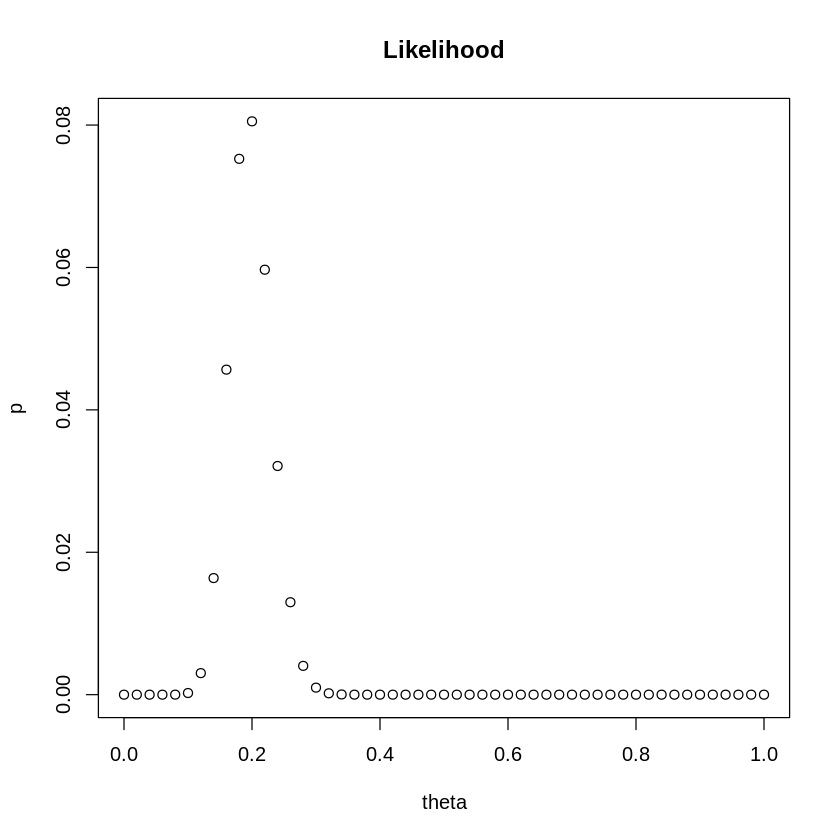

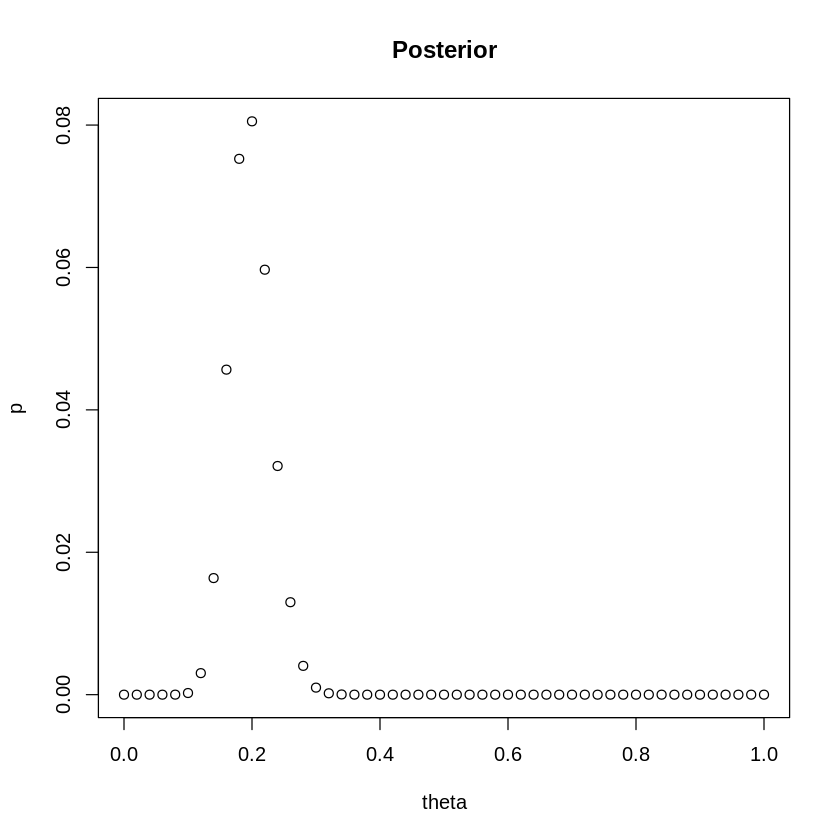

In [38]:
#Ex 1

#M = binomial distribution

#Posterior will also be the same binomial distribution (multiplied by costant and divided by same constant for normalization)

x <- 29
theta <- seq(0,1,0.02)
plot(theta,dbinom(29,150,theta), main = "Likelihood",ylab = "p")

plot(theta,(dbinom(29,150,theta)*0.02)/0.02, main = "Posterior",,ylab = "p")


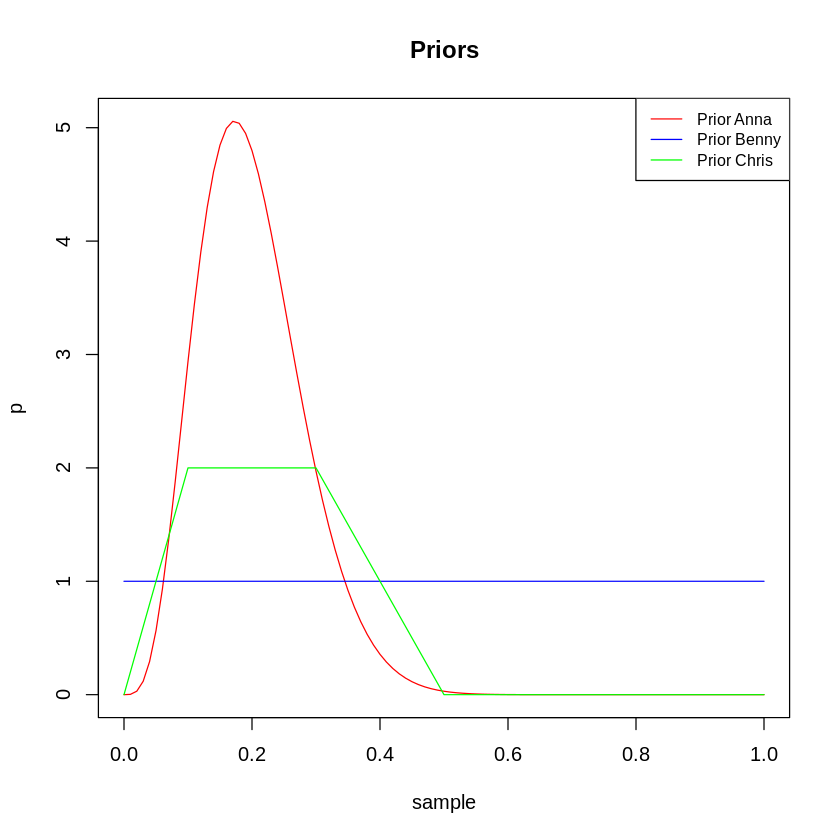

[1] "L'intervallo di confidenza per anna è al  0.951943745391345  % è tra  0.174  e  0.326"
[1] "L'intervallo di confidenza al  0.952508317747941  % è tra  0.184  e  0.356"
[1] "L'intervallo di confidenza al  0.951957897239804  % è tra  0.187  e  0.353"


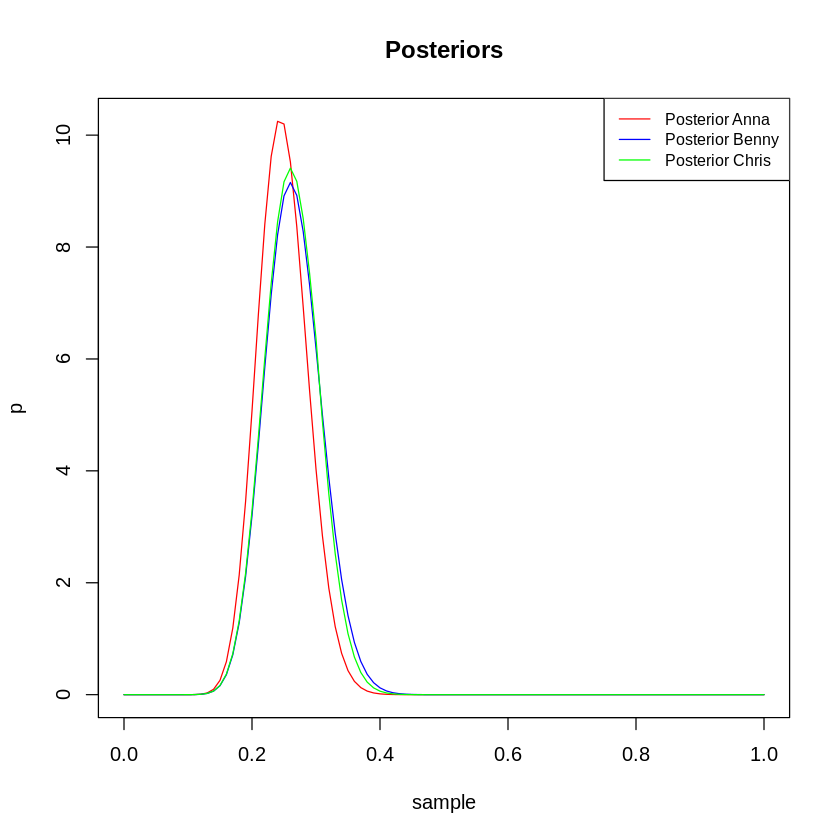

In [82]:
#Ex 2

#Use binomial Model

m_anna <- 0.2
std_anna <- 0.08*0.08
alpha <- m_anna*(m_anna*(1-m_anna)/std_anna -1)
beta <- (1-m_anna)*(m_anna*(1-m_anna)/std_anna -1)


trap <- function(x){
    if(x>0 & x < 0.1) return (20*x)
    else if(x >= 0.1 & x < 0.3) return (2)
    else if(x >= 0.3 & x < 0.5) return (5-10*x)
    else return (0)    
    }

sample <- seq(0,1,0.01)
plot(sample, dbeta(sample,alpha,beta),main = "Priors",col = "red",type = "l",ylab = "p")
lines(sample,dunif(sample,0,1),col = "blue")
lines(sample,lapply(sample,trap),col = "green")
legend(x="topright", y="topright",legend=c("Prior Anna","Prior Benny","Prior Chris"),col=c("red","blue","green"), lty=1, cex=0.8) 
    
norm_anna <- function(x){return (dbinom(26,100,x)*dbeta(x,alpha,beta))}    
norm_benny <- function(x){return (dbinom(26,100,x)*dunif(x,0,1))} 
norm_chris <- function(x){return (dbinom(26,100,x)*sapply(x,trap))} 
    
z_anna <- integrate(norm_anna,0,1)$value    
z_benny <- integrate(norm_benny,0,1)$value
z_chris <- integrate(norm_chris,0,1)$value    
    
plot(sample, (dbinom(26,100,sample)*dbeta(sample,alpha,beta))/z_anna,main = "Posteriors",,ylab = "p",col = "red",type = "l")    
lines(sample, (dbinom(26,100,sample)*dunif(sample,0,1))/z_benny,col = "blue")     
lines(sample, (dbinom(26,100,sample)*sapply(sample,trap))/integrate(norm_chris,0,1)$value,col = "green")   
legend(x="topright", y="topright",legend=c("Posterior Anna","Posterior Benny","Posterior Chris"),col=c("red","blue","green"), lty=1, cex=0.8) 
     
sigma_try <- seq(0,0.5,0.001)
     
    
theta_0_anna <- (which.max(sapply(sample,norm_anna)))*0.01   
sigma_anna = 0
CL_anna = 0    
for (i in sigma_try){
    
    if (integrate(norm_anna,theta_0_anna-i,theta_0_anna+i)$value/z_anna>0.95) {sigma_anna = 2*i
                                                                     CL_anna = integrate(norm_anna,theta_0_anna-i,theta_0_anna+i)$value/z_anna
                                                               break} 
    
    }      
print(paste("L'intervallo di confidenza per anna è al ",CL_anna ," % per anna è tra " ,(theta_0_anna-sigma_anna/2), " e ",(theta_0_anna+sigma_anna/2)))    
    
theta_0_benny <- (which.max(sapply(sample,norm_benny)))*0.01
sigma_benny = 0
CL_benny = 0    
for (i in sigma_try){
    
    if (integrate(norm_benny,theta_0_benny-i,theta_0_benny+i)$value/z_benny>0.95) {sigma_benny = 2*i
                                                                     CL_benny = integrate(norm_benny,theta_0_benny-i,theta_0_benny+i)$value/z_benny
                                                               break} 
    
    }  
    
print(paste("L'intervallo di confidenza al ",CL_benny ," % per benny è tra " ,(theta_0_benny-sigma_benny/2), " e ",(theta_0_benny+sigma_benny/2)))   
    
theta_0_chris <- (which.max(sapply(sample,norm_chris)))*0.01
sigma_chris = 0
CL_chris = 0    
for (i in sigma_try){
    
    if (integrate(norm_chris,theta_0_chris-i,theta_0_chris+i)$value/z_chris>0.95) {sigma_chris = 2*i
                                                                     CL_chris = integrate(norm_chris,theta_0_chris-i,theta_0_chris+i)$value/z_chris
                                                               break} 
    
    }  
    
print(paste("L'intervallo di confidenza al ",CL_chris ," % per chris è tra " ,(theta_0_chris-sigma_chris/2), " e ",(theta_0_chris+sigma_chris/2)))   
     

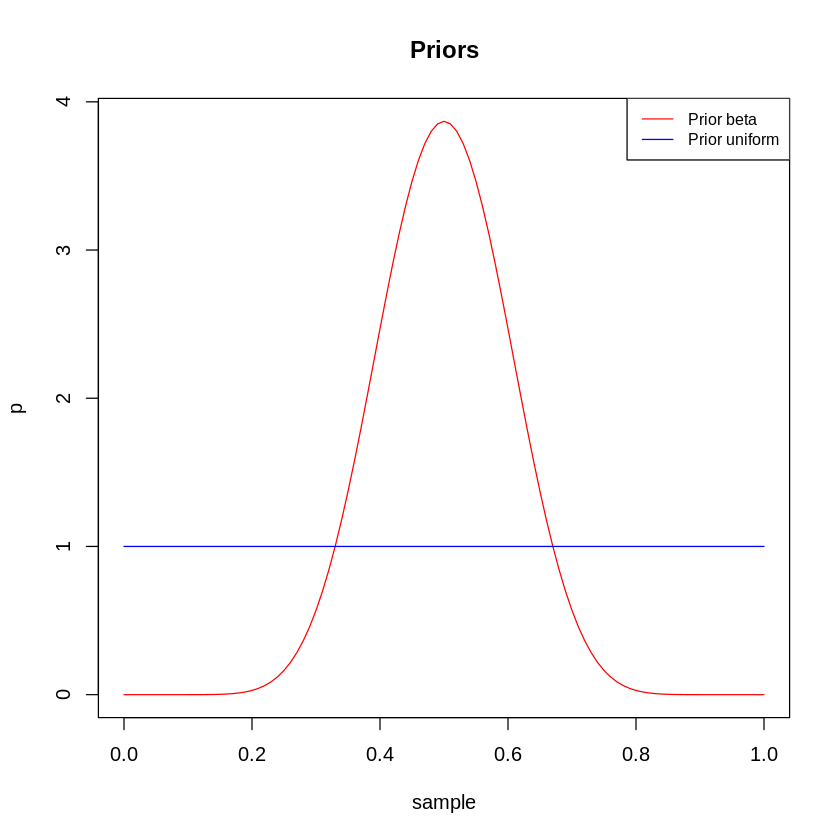

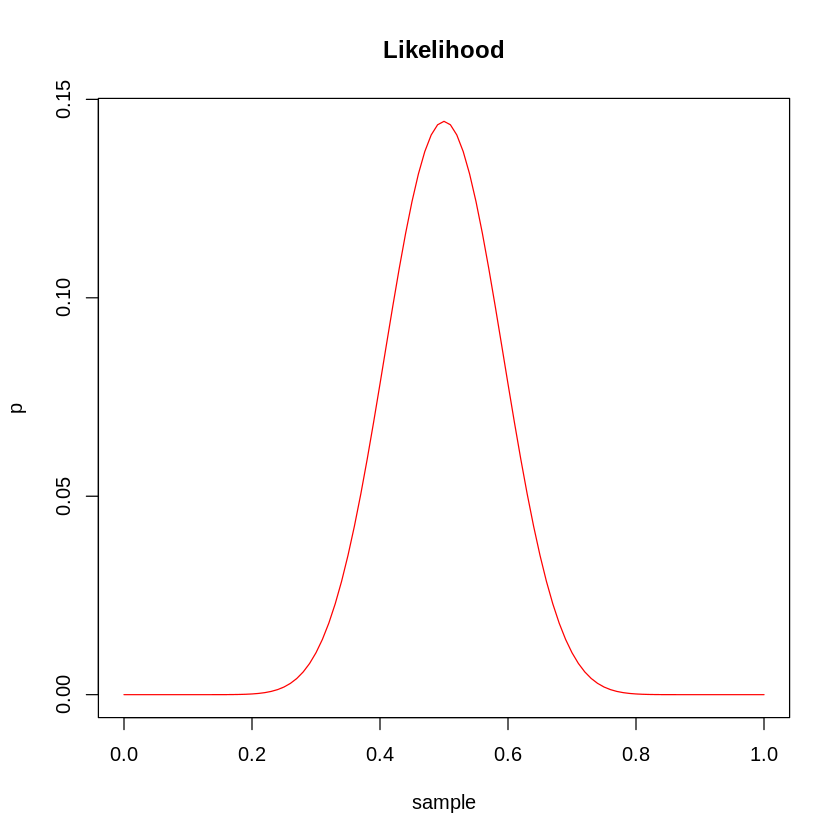

[1] "L'intervallo di confidenza con prior beta è al  0.951646747551838  % è tra  0.376  e  0.644"
[1] "L'intervallo di confidenza con prior uniforme è al  0.950656720342127  %  è tra  0.339  e  0.681"


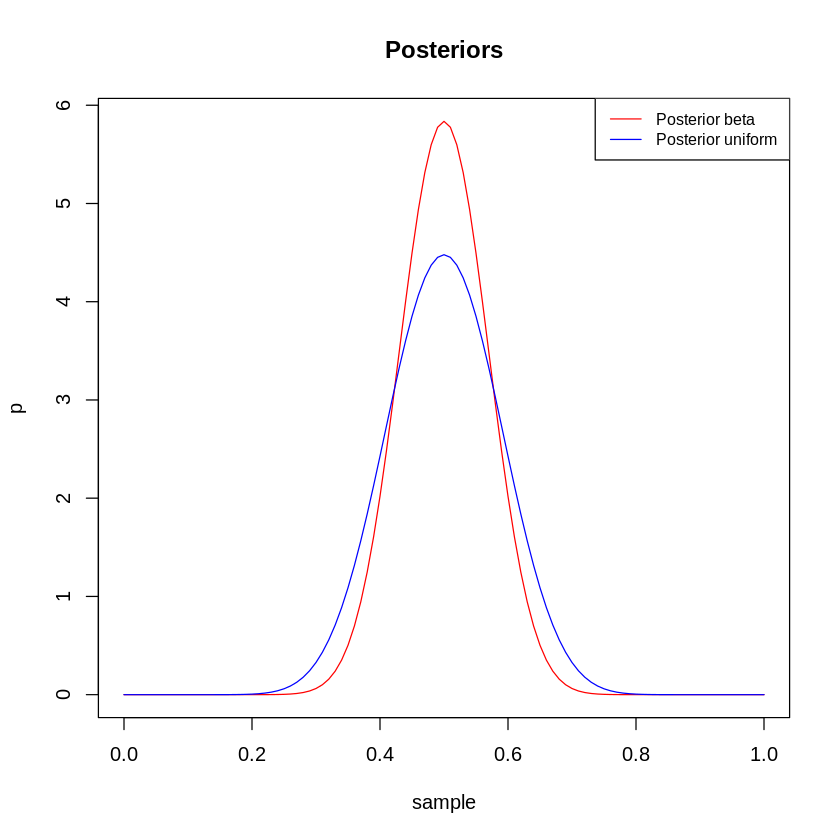

In [83]:
# Ex 3 part 1

data <- c("T","T","T","T","T","H","T","T","H","H","T","T","H","H","H","T","H","T","H","T","H","H","T","H","T","H","T","H","H","H")
data_n <- integer(30)
data_n[data=="T"]<-1

sample = seq(0,1,0.01)
m <- 0.5
std <- 0.01
alpha <- m*(m*(1-m)/std -1)
beta <- (1-m)*(m*(1-m)/std -1)

plot(sample, dbeta(sample,alpha,beta),main = "Priors",col = "red",type = "l",ylab = "p")
lines(sample,dunif(sample,0,1),col = "blue")
legend(x="topright", y="topright",legend=c("Prior beta","Prior uniform"),col=c("red","blue"), lty=1, cex=0.8) 

plot(sample, dbinom(15,30,sample),main = "Likelihood",col = "red",type = "l",ylab = "p")

norm_beta <- function(x){return (dbeta(x,alpha,beta)*dbinom(15,30,x))}
norm_unif <- function(x){return (dunif(x,0,1)*dbinom(15,30,x))}

z_beta <- integrate(norm_beta,0,1)$value
z_unif <- integrate(norm_unif,0,1)$value 


plot(sample, dbeta(sample,alpha,beta)*dbinom(15,30,sample)/z_beta,main = "Posteriors",col = "red",type = "l",ylab = "p")
lines(sample,dbinom(15,30,sample)*dunif(sample,0,1)/z_unif,col = "blue")
legend(x="topright", y="topright",legend=c("Posterior beta","Posterior uniform"),col=c("red","blue"), lty=1, cex=0.8) 

sigma_try <- seq(0,0.5,0.001)
       
theta_0_beta <- (which.max(sapply(sample,norm_beta)))*0.01   
sigma_beta = 0
CL_beta = 0    
for (i in sigma_try){
    
    if (integrate(norm_beta,theta_0_beta-i,theta_0_beta+i)$value/z_beta>0.95) {sigma_beta = 2*i
                                                                     CL_beta = integrate(norm_beta,theta_0_beta-i,theta_0_beta+i)$value/z_beta
                                                               break} 
    
    }      
print(paste("L'intervallo di confidenza con prior beta è al ",CL_beta ," % è tra " ,(theta_0_beta-sigma_beta/2), " e ",(theta_0_beta+sigma_beta/2)))    

theta_0_unif <- (which.max(sapply(sample,norm_unif)))*0.01   
sigma_unif = 0
CL_unif = 0    
for (i in sigma_try){
    
    if (integrate(norm_unif,theta_0_unif-i,theta_0_unif+i)$value/z_unif>0.95) {sigma_unif = 2*i
                                                                     CL_unif = integrate(norm_unif,theta_0_unif-i,theta_0_unif+i)$value/z_unif
                                                               break} 
    
    }      
print(paste("L'intervallo di confidenza con prior uniforme è al ",CL_unif ," %  è tra " ,(theta_0_unif-sigma_unif/2), " e ",(theta_0_unif+sigma_unif/2)))    


[1] "The  0.951571101273201 % CL with a beta prior after  30 tosses is  0.367 to 0.635"
[1] "The  0.951197346460196 % CL with a beta prior after  25 tosses is  0.392 to 0.674"
[1] "The  0.950910831926546 % CL with a beta prior after  20 tosses is  0.401 to 0.697"
[1] "The  0.951101010427089 % CL with a beta prior after  15 tosses is  0.385 to 0.699"
[1] "The  0.951256070790229 % CL with a beta prior after  10 tosses is  0.396 to 0.73"
[1] "The  0.951182544076808 % CL with a beta prior after  5 tosses is  0.411 to 0.777"


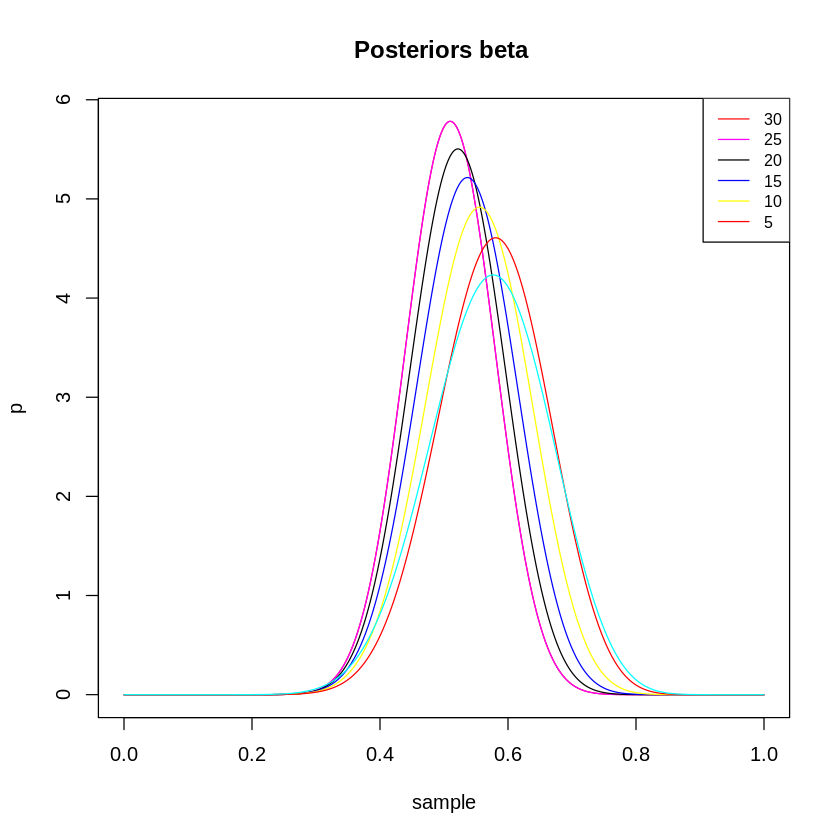

[1] "The  0.950137151666467 % CL with a uniform prior after  30 tosses is  0.329 to 0.635"
[1] "The  0.950858667869971 % CL with a uniform prior after  25 tosses is  0.374 to 0.674"
[1] "The  0.950669934626425 % CL with a uniform prior after  20 tosses is  0.396 to 0.697"
[1] "The  0.9507540262296 % CL with a uniform prior after  15 tosses is  0.37 to 0.699"
[1] "The  0.950484588151281 % CL with a uniform prior after  10 tosses is  0.415 to 0.73"
[1] "The  0.950377191555885 % CL with a uniform prior after  5 tosses is  0.55 to 0.777"


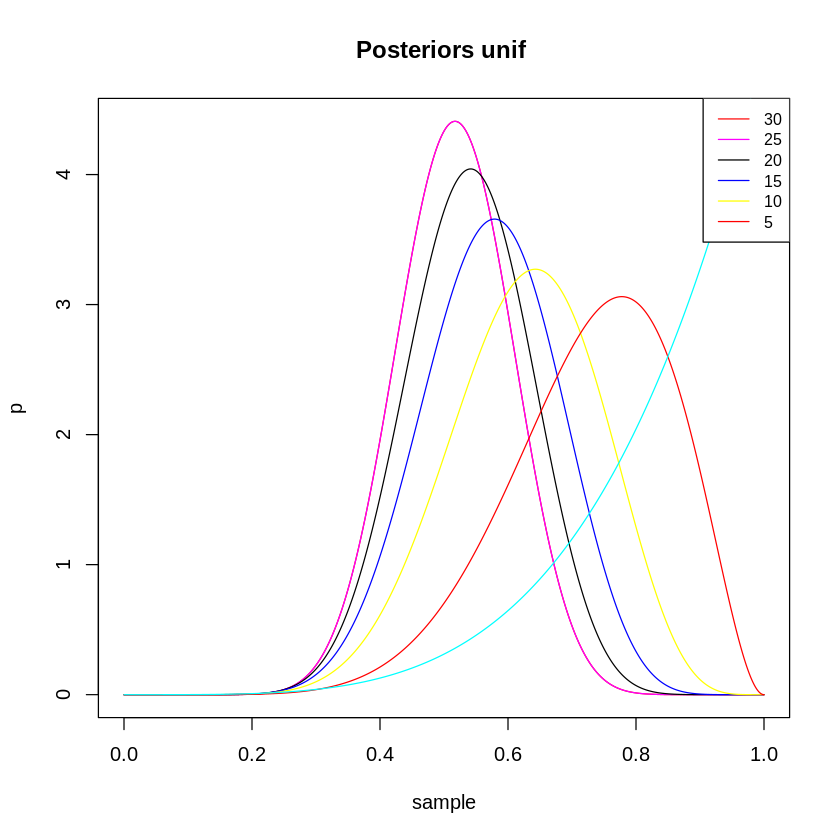

In [139]:
#Ex 3 part 2

data <- c("T","T","T","T","T","H","T","T","H","H","T","T","H","H","H","T","H","T","H","T","H","H","T","H","T","H","T","H","H","H")
data_n <- integer(30)
data_n[data=="T"]<-1
#heads <- vector()
#for (k in length(data_n)) heads <- c(heads,sum(data_n[1:k])) 

epsilon = 0.001
sample <- seq(0,1,epsilon)
m <- 0.5
std <- 0.01
alpha <- m*(m*(1-m)/std -1)
beta <- (1-m)*(m*(1-m)/std -1)
prior_beta <- matrix(0,nrow=length(sample),ncol=length(data_n)+1)
prior_unif <- matrix(0,nrow=length(sample),ncol=length(data_n)+1)
prior_beta[,1] <- dbeta(sample,alpha,beta)
prior_unif[,1] <- dunif(sample,0,1)

theta_0_beta <- vector()
theta_0_unif <- vector()
CL_beta <-vector()
CL_unif <- vector()
sigma_b <- vector()
sigma_u <-vector()

for (k in seq(1,length(data_n),1)){
    
    norm_beta <- function(x){return (prior_beta[,k]*dbinom(data_n[k],1,x))}
    norm_unif <- function(x){return (prior_unif[,k]*dbinom(data_n[k],1,x))}
    integ_beta <- function(a,b){
        sum(prior_beta[round(a/epsilon):round(b/epsilon)+1,k]*dbinom(data_n[k],1,seq(a,b,epsilon))*epsilon)
        } 
    integ_unif <- function(a,b){
        sum(prior_unif[round(a/epsilon):round(b/epsilon)+1,k]*dbinom(data_n[k],1,seq(a,b,epsilon))*epsilon)
        } 
    
    z_beta <- integ_beta(0,1)
    z_unif <- integ_unif(0,1) 
       
    prior_beta[,k+1]<-prior_beta[,k]*dbinom(data_n[k],1,sample)/z_beta
    
    theta_0_b <- min(c(1,(which.max(norm_beta(sample)))*epsilon)) 
    sigma_b = 0
    CL_b = 0 
    for (i in sample){
    
        if (integ_beta(theta_0_b-i,theta_0_b+i)/z_beta>0.95) {sigma_b = 2*i
                                                                     CL_b = integ_beta(theta_0_b-i,theta_0_b+i)/z_beta
                                                               break} 
    
    }      
    theta_0_beta <- c(theta_0_beta,theta_0_b)
    CL_beta <- c(CL_beta,CL_b)
    sigma_beta <-c(sigma_beta,sigma_b)
    
    prior_unif[,k+1]<-prior_unif[,k]*dbinom(data_n[k],1,sample)/z_unif
    
    theta_0_u <- min(c((which.max(norm_unif(sample)))*epsilon,1-epsilon)) 
    sigma_u = 0
    CL_u = 0    
    for (i in sample){
    
        if (integ_unif(max(c(0,theta_0_u-i)),min(c(theta_0_u+i,1)))/z_unif>0.95) {sigma_u = 2*i
                                                                     CL_u = integ_unif(max(c(0,theta_0_u-i)),min(c(theta_0_u+i,1)))/z_unif
                                                               break} 
    
    }      
    theta_0_unif <- c(theta_0_unif,theta_0_u)
    CL_unif <- c(CL_unif,CL_u)
    sigma_unif <-c(sigma_unif,sigma_u)
}

plot(sample, prior_beta[,length(data_n)],main = "Posteriors beta ",col = 50,type = "l",ylab = "p")
legend_b <- vector() 
col_b <-50 
for (j in seq(length(data_n),1,-5)) {
    legend_b <- c(legend_b,as.character(j))
    col_b <- c(col_b,j)
    lines(sample,prior_beta[,j],col = j)
    print(paste("The ", CL_beta[j],"% CL with a beta prior after ",j,"tosses is " , theta_0_beta[j]-sigma_beta[j]/2,"to",theta_0_beta[j]+sigma_beta[j]/2 ))
    }
legend(x="topright", y="topright",legend=legend_b,col=col_b, lty=1, cex=0.8)

plot(sample, prior_unif[,length(data_n)],main = "Posteriors unif ",col = 50,type = "l",ylab = "p")
legend_u <- vector() 
col_u <-50 
for (j in seq(length(data_n),1,-5)) {
    legend_u <- c(legend_u,as.character(j))
    col_u <- c(col_u,j)
    lines(sample,prior_unif[,j],col = j)
    print(paste("The ", CL_unif[j],"% CL with a uniform prior after ",j,"tosses is " , theta_0_unif[j]-sigma_unif[j]/2,"to",theta_0_beta[j]+sigma_beta[j]/2))
    }
legend(x="topright", y="topright",legend=legend_u,col=col_u, lty=1, cex=0.8)

